In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('../../data/Airbnb prediction.csv')
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [67]:
data.shape

(74111, 29)

In [68]:
colObj = data.select_dtypes('object').columns

for col in colObj:
    print(col, ":", data[col].nunique(), "unique values")

property_type : 35 unique values
room_type : 3 unique values
amenities : 67122 unique values
bed_type : 5 unique values
cancellation_policy : 5 unique values
city : 6 unique values
description : 73479 unique values
first_review : 2554 unique values
host_has_profile_pic : 2 unique values
host_identity_verified : 2 unique values
host_response_rate : 80 unique values
host_since : 3087 unique values
instant_bookable : 2 unique values
last_review : 1371 unique values
name : 73359 unique values
neighbourhood : 619 unique values
thumbnail_url : 65883 unique values
zipcode : 769 unique values


In [69]:
data.isna().sum()[data.isna().sum() != 0]

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

Text(0.5, 1.0, 'Price (exp(log_price)) vs Index')

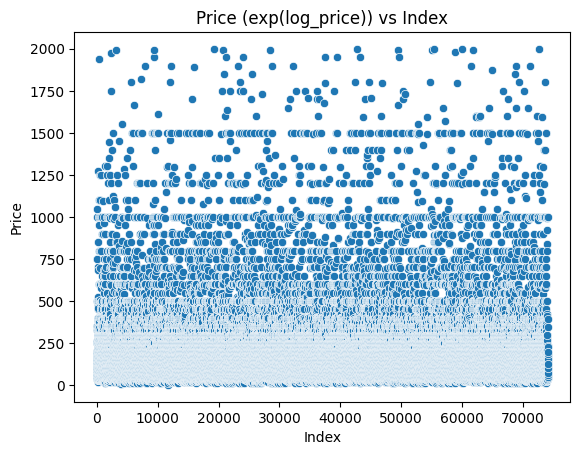

In [70]:
# use numpy's vectorized exp and provide x and y to scatterplot
sns.scatterplot(x=data.index, y=np.exp(data['log_price']))
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price (exp(log_price)) vs Index')

In [71]:
outliers = data[(data['log_price'] < 2.5) | (data['log_price'] > 7.5)]

data.drop(outliers.index, inplace=True)
data.shape

(74037, 29)

In [72]:
data = data.drop(columns=[
    'id', 'description', 'first_review', "number_of_reviews",
    "name", "longitude", "latitude", "host_has_profile_pic", "host_identity_verified", "host_since", "host_response_rate",
    "review_scores_rating", "thumbnail_url", "zipcode", "instant_bookable", "last_review"
])

data.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'neighbourhood', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
data.drop_duplicates(["log_price", "amenities", "city", "neighbourhood"], inplace=True)

data.duplicated().sum()

np.int64(0)

<Axes: xlabel='log_price', ylabel='Count'>

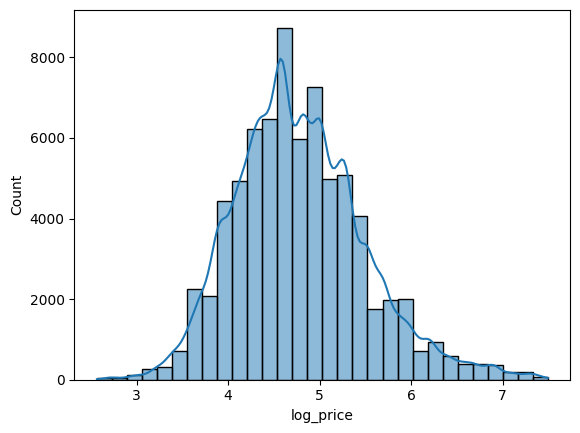

In [78]:
sns.histplot(data=data, x="log_price", bins=30, kde=True)

<Axes: xlabel='log_price'>

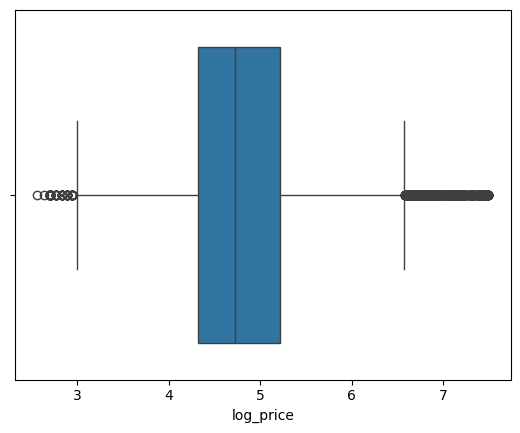

In [79]:
sns.boxplot(data=data, x="log_price")

In [82]:
data["property_type"].value_counts()

property_type
Apartment             48641
House                 16283
Condominium            2642
Townhouse              1682
Loft                   1242
Other                   603
Guesthouse              496
Bed & Breakfast         452
Bungalow                366
Villa                   170
Dorm                    128
Guest suite             121
Camper/RV                91
Timeshare                75
Cabin                    72
In-law                   71
Boutique hotel           67
Boat                     64
Hostel                   56
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       7
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 